In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
pip install wquantiles

In [ ]:
import wquantiles

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
STATE_CSV = '/content/drive/My Drive/datascience/data/housing.csv'
state = pd.read_csv(STATE_CSV,delim_whitespace=True)

In [ ]:
state

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
state.shape

(505, 14)

In [ ]:
column_name=[
    "1","2","3","4","5","6","7","8","9","10","11","12","13","14"
]

In [ ]:
state = pd.read_csv(STATE_CSV, delim_whitespace=True, names=column_name)

In [ ]:
state.head(11)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [ ]:
Mean=state.drop('14',axis=1).mean()
print(Mean)

1       3.613524
2      11.363636
3      11.136779
4       0.069170
5       0.554695
6       6.284634
7      68.574901
8       3.795043
9       9.549407
10    408.237154
11     18.455534
12    356.674032
13     12.653063
dtype: float64


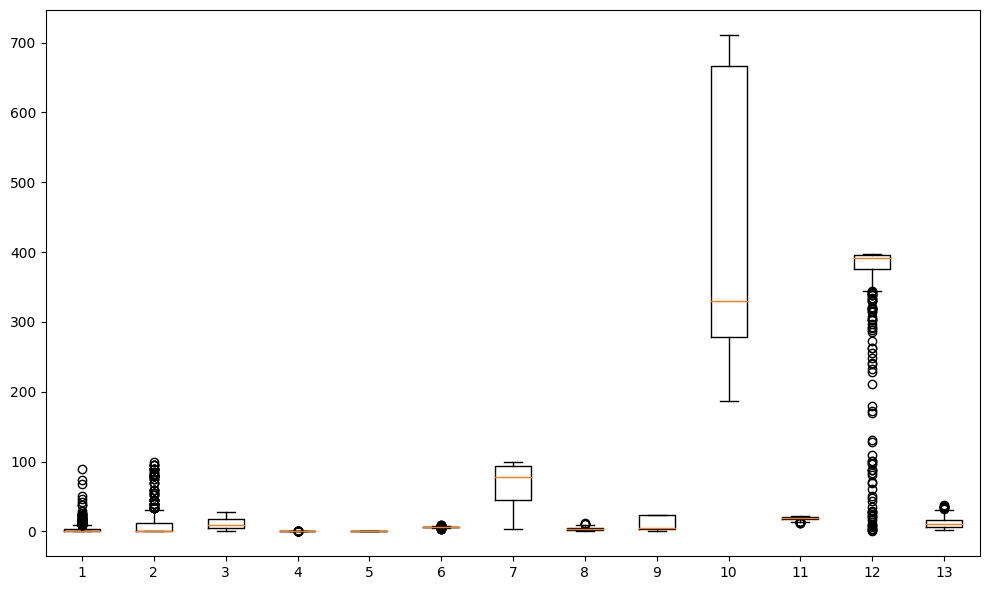

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(state.drop('14',axis=1))
plt.tight_layout()
plt.show()

In [ ]:
correlation= state.corr()#this is the correlation method used for finding correlation
correlation_modified=correlation['14'].drop('14')#this is used to drop the 14th column which is basically our output
top=correlation_modified.sort_values(ascending=False)#this is used to sort data in decending order
top=top.head(5).index #the use of index method is for taking the indexes of the top five
print("this is not modified correlation\n", correlation)
print("this is modified correlation \n",correlation_modified)
print("these are the top 5 values",top)

this is not modified correlation
            1         2         3         4         5         6         7  \
1   1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
2  -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
3   0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
4  -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
5   0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
6  -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
7   0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
8  -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
9   0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
10  0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
11  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
12 -0.385064  0.175520 -0.356977  0.048788 -0.380051  

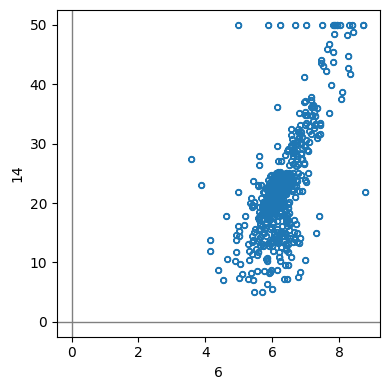

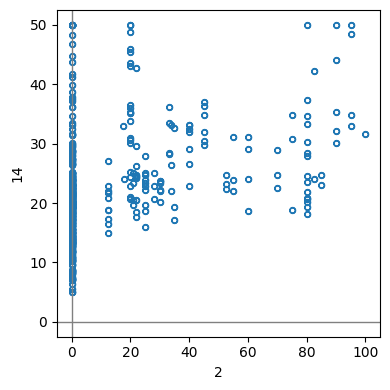

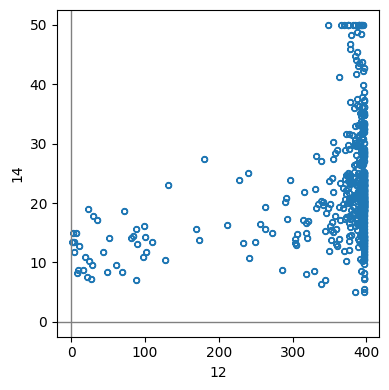

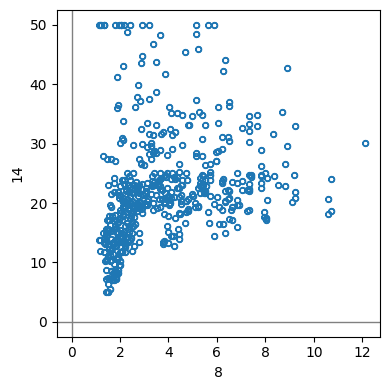

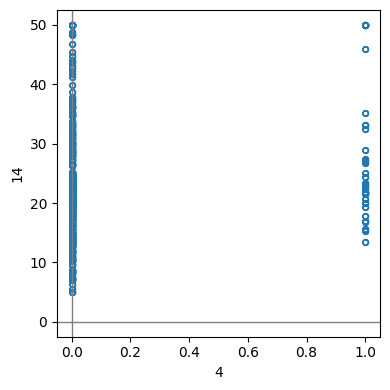

In [ ]:
#I take this enumerate function from gpt. The enumerate() function is used to iterate over top, and the 0 argument specifies that the indexing should start at 0.
for i, var in enumerate(top, 0):
  ax = state.plot.scatter(x=var, y='14', figsize=(4, 4), marker='$\u25EF$')
  ax.set_xlabel(var)
  ax.set_ylabel('14')
  ax.axhline(0, color='grey', lw=1)
  ax.axvline(0, color='grey', lw=1)

  plt.tight_layout()
  plt.show()